2.1 con librerías 

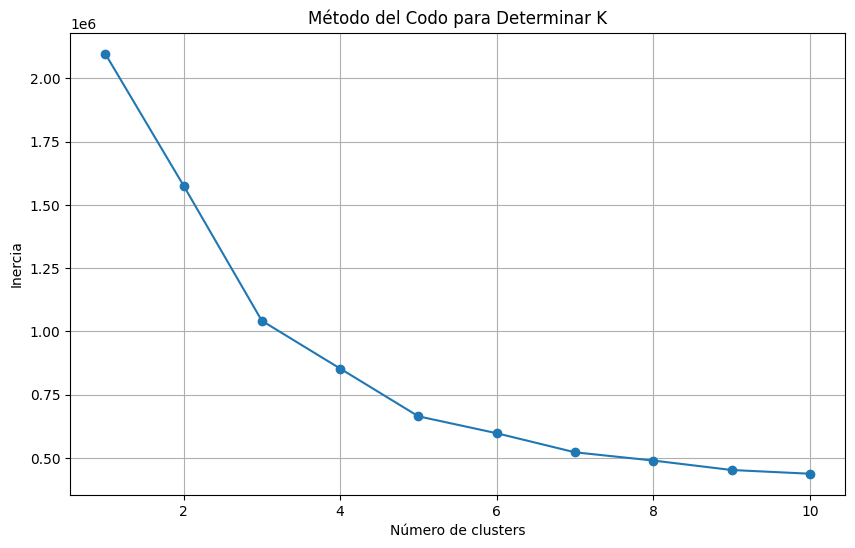

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


data = pd.read_csv("./bank_transactions.csv")

# Encoding de variables categóricas
categorical_vars = ['CustGender', 'CustLocation']
encoder = LabelEncoder()
for var in categorical_vars:
    data[var] = encoder.fit_transform(data[var])

# Escalado de variables numéricas
numerical_vars = ['CustAccountBalance', 'TransactionAmount (INR)']
scaler = StandardScaler()

# Imputación de valores faltantes 
imputer = SimpleImputer(strategy='mean')
data[numerical_vars] = imputer.fit_transform(data[numerical_vars])

# Escalado de datos después de la imputación
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

# Implementación del algoritmo K-Means
def k_means(X, n_clusters, max_iterations=100, tolerance=1e-4):
    np.random.seed(42)  # Para reproducibilidad
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iterations):
        # Paso 2: Asignar cada punto al centroide más cercano
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([X[labels == i].mean(axis=0) if X[labels == i].size > 0 else centroids[i] for i in range(n_clusters)])

        # Convergencia: si los centroides no cambian significativamente, detener el algoritmo
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tolerance):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Implementación del método del codo para determinar el número óptimo de clusters
def calculate_inertia(X, centroids, labels):
    inertia = 0
    for i, center in enumerate(centroids):
        inertia += np.sum((X[labels == i] - center) ** 2)
    return inertia

# Selecciona las características numéricas escaladas para aplicar K-Means
X = data[numerical_vars].values

# Aplicar PCA para reducir a 2 componentes para la visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Rango de valores de k para probar
k_values = range(1, 11)
inertias = []

# Calcular la inercia para cada valor de k
for k in k_values:
    labels, centroids = k_means(X_pca, k)
    inertia = calculate_inertia(X_pca, centroids, labels)
    inertias.append(inertia)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


n_clusters_optimo = 4
labels, centroids = k_means(X_pca, n_clusters_optimo)

# Calcular el Silhouette Score para el número óptimo de clusters
score = silhouette_score(X_pca, labels)
print('Silhouette Score para n_clusters_optimo:', score)

# Visualización de los clusters en las componentes principales
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters_optimo):
    plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.title('Clusters en Componentes Principales')
plt.xlabel('PC1 (Componente Principal 1)')
plt.ylabel('PC2 (Componente Principal 2)')
plt.legend()
plt.show()


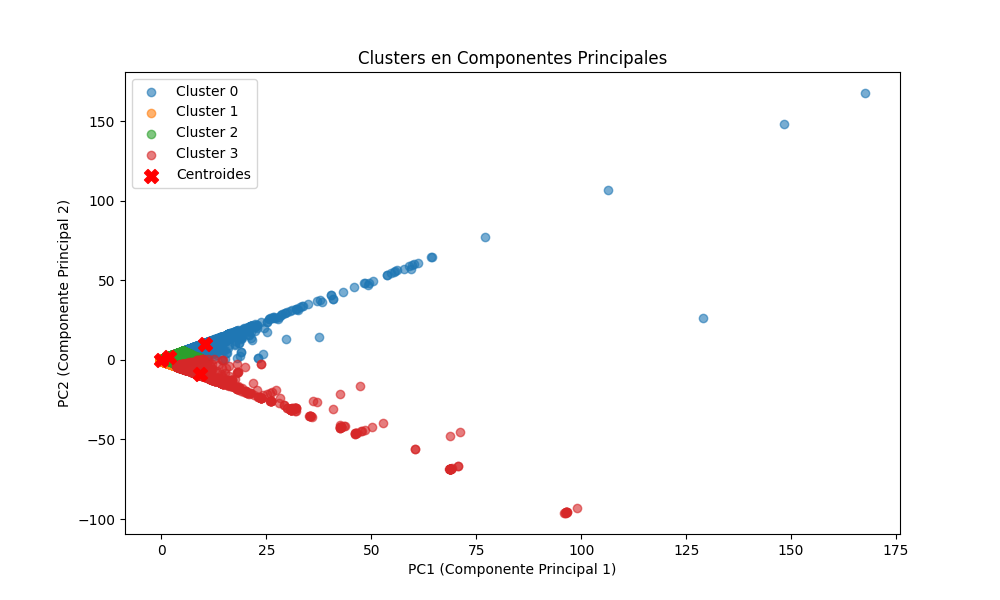

Procesamiento del dataset:
El dataset contenía variables categóricas como 'CustGender' y 'CustLocation'. Estas variables se convirtieron a valores numéricos utilizando la clase LabelEncoder de la librería Scikit-learn. Esto asignó un número entero único a cada categoría en las variables categóricas.

Las variables numéricas, como 'CustAccountBalance' y 'TransactionAmount', a menudo tenían escalas diferentes. Para asegurarse de que todas las características contribuyeran de manera equitativa al modelo, se escalarón a un rango común utilizando la clase StandardScaler de Scikit-learn. Esto transformó las características para que tuvieran una media de 0 y una desviación estándar de 1.

Se utilizó la clase SimpleImputer de Scikit-learn, que rellenó los valores faltantes con la media de las columnas correspondientes.


Para aplicar K-Means, se seleccionaron las características numéricas escaladas ('CustAccountBalance' y 'TransactionAmount') como variables de entrada. 


Las características escogidas son 'CustAccountBalance' y 'TransactionAmount'. Estas son las dos variables que se utilizaron para la visualización de los clusters.


La métrica de Silhouette se utilizó porque proporciona una medida de cuán bien separados están los clusters. Esta métrica calcula el grado de separación entre los clusters y cuán similares son los puntos dentro de cada cluster. Un valor de Silhouette cercano a +1 indica que los puntos están bien agrupados, mientras que un valor cercano a -1 indica que los puntos podrían estar mejor agrupados en clusters diferentes.

La gráfica en particular,muestra que el  punto de codo se observa en el número de clústeres igual a 4, ya que es el punto donde la caída en la inercia comienza a disminuir. Esto sugeriría que el número óptimo de clústeres para los datos que se están analizando sería 4. Después de este punto, las mejoras en la reducción de la inercia se vuelven marginales a medida que se aumenta el número de clústeres.